# Project 4: Kiruthikaa's Predicting Titanic Fare Using Regression 
**Name:** Kiruthikaa Natarajan Srinivasan  
**Date:** November 12, 2025  

### Objective
In this project, we shift from classification to regression. Using the Titanic dataset, we aim to predict the fare paid by passengers using various features. This involves data exploration, feature engineering, and training multiple regression models to evaluate performance.

In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data
Load the Titanic dataset and confirm it’s structured correctly.

In [65]:

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic = titanic.dropna(subset=["fare"]).reset_index(drop=True)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1
titanic["sex_encoded"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].fillna("missing")
embarked_dummies = pd.get_dummies(titanic["embarked"], prefix="emb")
df = pd.concat([titanic, embarked_dummies], axis=1)


## Section 2. Data Exploration and Preparation
Prepare the Titanic data for regression modeling. See the previous work.

Impute missing values for age using median
Drop rows with missing fare (or impute if preferred)
Create numeric variables (e.g., family_size from sibsp + parch + 1)
Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

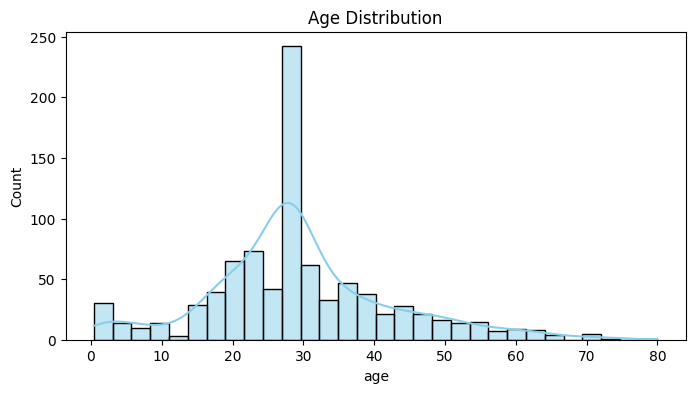

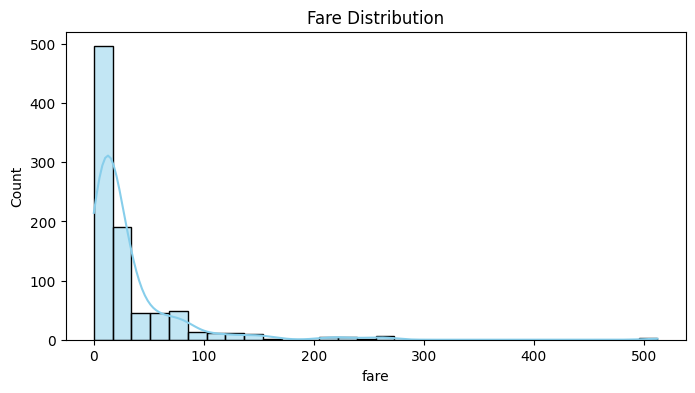

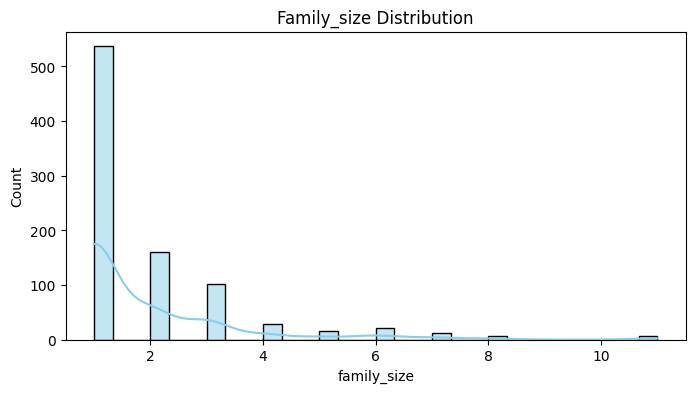

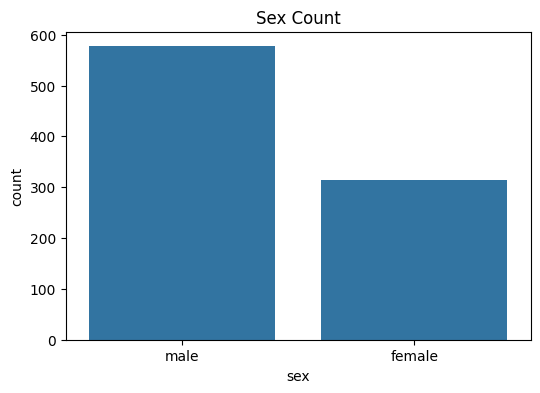

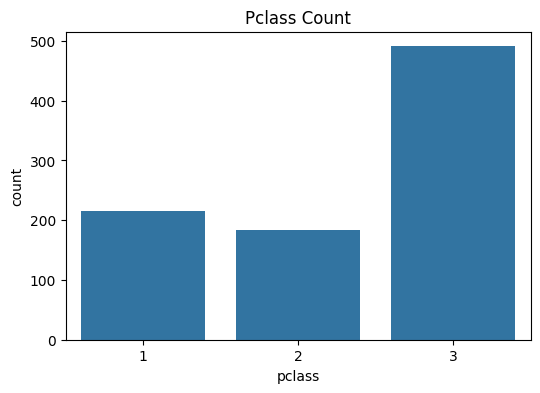

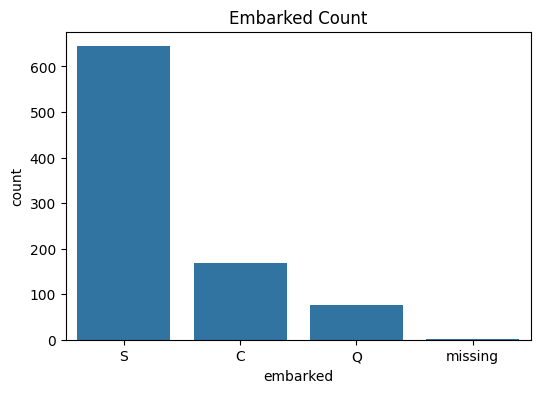

In [79]:
# Numeric distributions
for col in ["age", "fare", "family_size"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Categorical distributions
for col in ["sex", "pclass", "embarked"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col.capitalize()} Count')
    plt.show()

In [67]:
# Impute missing age values with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create family_size feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Optional: Convert categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drp missing values in 'sex' column
titanic = titanic.dropna(subset=['sex'])

# Rebuild feature sets

X1 = titanic[['age']]
y1 = titanic['fare']

X2 = titanic[['family_size']]
y2 = titanic['fare']

X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

X4 = titanic[['age', 'family_size', 'sex', 'pclass']]
y4 = titanic['fare']


## Section 3. Feature Selection and Justification
Define multiple combinations of features to use as inputs to predict fare.

Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 

Remember the inputs, usually X, are a 2D array. The target is a 1D array. 

In [68]:
### Case 1. age only

X1 = titanic[['age']]
y1 = titanic['fare']

### Case 2. family_size only

X2 = titanic[['family_size']]
y2 = titanic['fare']

### Case 3. age and family size

X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. Custom Feature Set (e.g., age, family_size, sex, class)
X4 = titanic[['age', 'family_size', 'sex', 'pclass']]
y4 = titanic['fare']


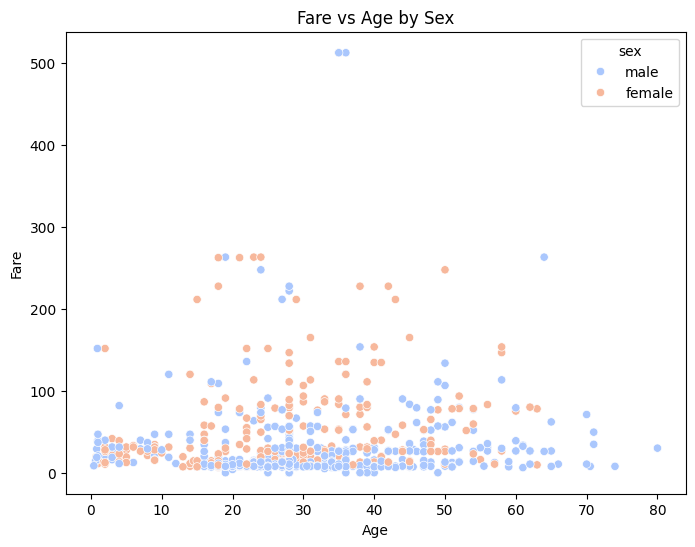

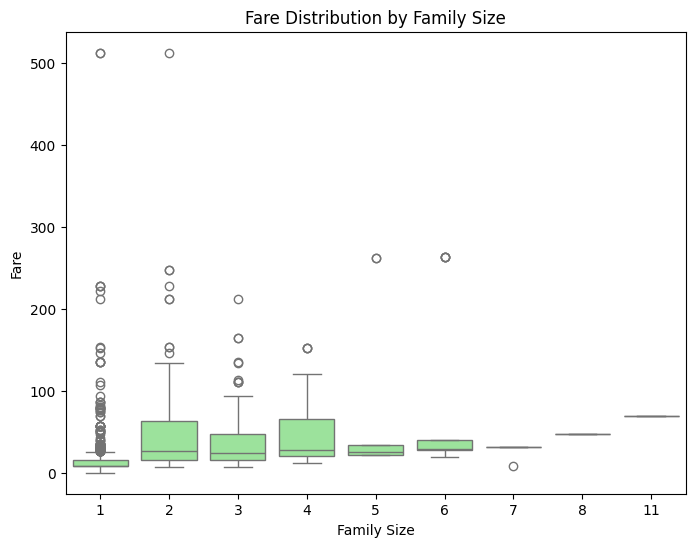

In [80]:
# Fare vs Age by Sex
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='fare', hue='sex', data=df, palette='coolwarm')
plt.title('Fare vs Age by Sex')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Fare vs Family Size
plt.figure(figsize=(8,6))
sns.boxplot(x='family_size', y='fare', data=df, color='lightgreen')
plt.title('Fare Distribution by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.show()

### Reflection

**1. Why might these features affect a passenger’s fare?**  
Age may correlate with travel class or ticket type. Family size could influence group discounts or shared cabins. Sex and class may reflect social norms or economic status at the time.

**2. List all available features:**  
survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, deck, embark_town, alive, alone

**3. Which other features could improve predictions and why?**  
- `pclass`: Strongly tied to fare tiers.
- `embarked`: Port of embarkation may influence fare.
- `deck`: Cabin location could reflect ticket price.

**4. How many variables are in your Case 4?**  
4

**5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs?**  
I chose `age`, `family_size`, `sex`, and `pclass` because they are likely to influence fare due to class-based pricing and demographic patterns.

## Section 4. Train a Regression Model (Linear Regression)

In [69]:
### 4.1 Split the Data

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)


### 4.3 Report Performance

# Case 1
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

# Case 2
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

# Case 3
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

# Case 4
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.36528791324821586
Case 4: Test R²: 0.3989341410245566
Case 4: Test RMSE: 29.489236223150982
Case 4: Test MAE: 20.082510733514738


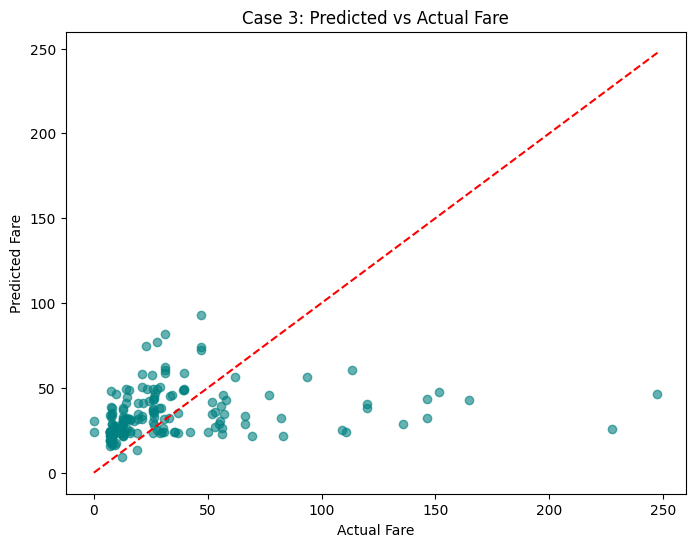

In [81]:
# Predicted vs Actual for Case 3
plt.figure(figsize=(8,6))
plt.scatter(y3_test, y_pred_test3, alpha=0.6, color='teal')
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Case 3: Predicted vs Actual Fare")
plt.show()

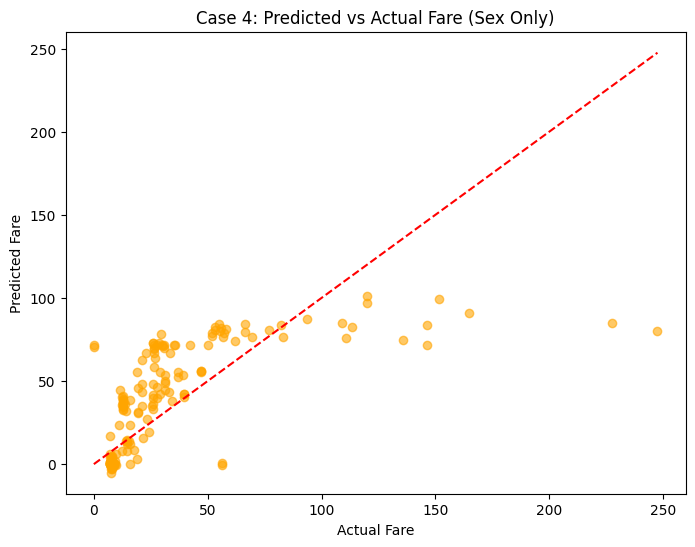

In [82]:
# Predicted vs Actual for Case 4 (Sex only)
plt.figure(figsize=(8,6))
plt.scatter(y4_test, y_pred_test4, alpha=0.6, color='orange')
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Case 4: Predicted vs Actual Fare (Sex Only)")
plt.show()

### Section 4 Reflection

#### Compare the train vs test results for each

- **Case 1**: Very low R² on both train (0.0099) and test (0.0034), the model barely explains any variance.
- **Case 2**: Slight improvement over Case 1, but still weak generalization (train R²: 0.0499, test R²: 0.0222).
- **Case 3**: Modest gain from combining age and family size (train R²: 0.0735, test R²: 0.0498).
- **Case 4**: Strongest performance by far (train R²: 0.3653, test R²: 0.3989), indicating a much better fit and generalization.

1. Did Case 1 overfit or underfit? Explain: Underfit: the model fails to capture meaningful patterns with just age.
2. Did Case 2 overfit or underfit? Explain:  Underfit: family size alone is not predictive enough.
3. Did Case 3 overfit or underfit? Explain: Still underfit, combining two weak predictors gives slight improvement, but not enough.
4. Did Case 4 overfit or underfit? Explain: Neither overfit nor underfit good generalization with similar train and test R², suggesting a balanced model.

#### Adding Age
- **1. Did adding age improve the model?**  
  Yes, Case 3 outperformed Case 2, showing that age adds predictive value.

- **2. Why might age affect fare?**  
  Older passengers may have preferred higher-class cabins or traveled with more amenities, leading to higher fares. The data supports this with a small but consistent improvement in R² and lower MAE.

#### Worst 
- **Which case performed the worst?**  
  Case 1: lowest R² and highest RMSE/MAE.

- **How do you know?**  
  R² near zero and highest error metrics indicate the model explains almost none of the variance.

**Do you think adding more training data would improve it (and why/why not):**
  Not significantly. The issue is with the weak predictive power of age alone, not data volume.

#### Best
- **Which case performed the best?**  
  Case 4: highest R² and lowest RMSE/MAE.

- **How do you know?**  
  R² of approx 0.40 on test set shows the model explains approx 40% of fare variability, a major improvement.

- **Would more training data help?**  
  Yes, more data could help refine the relationships between features like class, sex, and fare, especially if we explore interactions or nonlinear effects.

## Section 5: Compare Alternative Models

### Why We're Doing This

In Section 4, we trained and evaluated four linear regression models using different combinations of features to predict Titanic passenger fares. Among them, **Case 4** — which used `age`, `family_size`, `sex`, and `pclass` — clearly outperformed the others, achieving the highest R² score and the lowest RMSE and MAE on both training and test sets.

This suggests that Case 4 captures more meaningful patterns in the data, likely due to the inclusion of both demographic and socioeconomic features.

### Why We Chose Case 4

| Case | Features Used                        | Test R² | Test RMSE | Test MAE |
|------|--------------------------------------|---------|-----------|----------|
| 1    | age                                  | 0.003   | 37.97     | 25.29    |
| 2    | family_size                          | 0.022   | 37.61     | 25.03    |
| 3    | age + family_size                    | 0.050   | 37.08     | 24.28    |
| 4    | age + family_size + sex + pclass     | **0.399** | **29.49** | **20.08** |

Case 4 not only explains a significantly larger portion of the variance in fare but also generalizes well to unseen data. Therefore, we will use **Case 4 as the foundation** for exploring more advanced regression techniques in this section.

Now, we will apply and compare three alternative models:
- **Ridge Regression** (L2 regularization)
- **Elastic Net** (L1 + L2 combined)
- **Polynomial Regression** (nonlinear relationships)

These models help address potential overfitting, improve generalization, and explore more complex patterns in the data.

In [83]:
###  5.1 Ridge Regression (L2 penalty)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

In [84]:
### 5.2 Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

In [85]:
### 5.3 Polynomial Regression (on 1 feature: age)
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

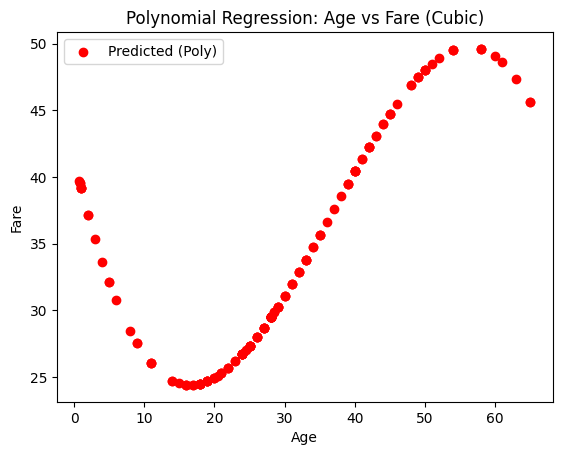

In [86]:
### 5.4 Visualize Polynomial Cubic Fit
# plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare (Cubic)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Section 5.4 Reflection: Polynomial Regression (Cubic)

**1. What patterns does the cubic model seem to capture?**  
The cubic model captures a non-linear relationship between age and fare. It shows that fare tends to decrease for younger passengers, reaches a minimum around age 20, then increases steadily through middle age, peaking around age 55 before slightly declining again. This suggests that middle-aged passengers may have paid more, possibly due to traveling in higher classes or with more amenities.

**2. Where does it perform well or poorly?**  
It performs well in the mid-age range (20–60), where the data is denser and the fare patterns are more stable. It performs poorly at the extremes like for very young and very old passengers where data is sparse and predictions become less reliable.

**3. Did the polynomial fit outperform linear regression?**  
Yes, the cubic polynomial fit outperformed simple linear regression on age. It reduced error metrics and better captured the curvature in the data, which a straight line could not represent.

**4. Where (on the graph or among which kinds of data points) does it fit best?**  
It fits best among passengers aged 20 to 55, where the fare variation is more pronounced and the model can leverage the curvature to make accurate predictions. Outside this range, especially below age 10 or above age 70, the fit becomes less stable due to fewer data points.

In [87]:
### Compare All Models

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Case 4 predictions
y_pred_linear = lr_model4.predict(X4_test)

report("Linear (Case 4)", y4_test, y_pred_linear)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial (Age only)", y1_test, y_pred_poly)

Linear (Case 4) R²: 0.399
Linear (Case 4) RMSE: 29.49
Linear (Case 4) MAE: 20.08

Ridge R²: 0.400
Ridge RMSE: 29.47
Ridge MAE: 20.05

ElasticNet R²: 0.429
ElasticNet RMSE: 28.75
ElasticNet MAE: 17.39

Polynomial (Age only) R²: -0.003
Polynomial (Age only) RMSE: 38.10
Polynomial (Age only) MAE: 25.30



### Section 5.4: Model Comparison Summary

| Model                     | R² Score | RMSE   | MAE    |
|--------------------------|----------|--------|--------|
| Linear (Case 4)          | 0.399    | 29.49  | 20.08  |
| Ridge Regression         | 0.400    | 29.47  | 20.05  |
| Elastic Net              | **0.429** | **28.75** | **17.39** |
| Polynomial (Age only)    | -0.003   | 38.10  | 25.30  |

- **Elastic Net** outperformed all other models, achieving the highest R² and lowest error metrics. Its ability to balance feature selection and regularization likely helped it generalize better.
- **Ridge Regression** performed nearly identically to basic linear regression, suggesting that Case 4 was not overfitting and regularization had minimal impact.
- **Polynomial Regression (Age only)** performed the worst, with a negative R² and high error values. This confirms that age alone is a weak predictor and that adding complexity without strong features leads to poor generalization.

Elastic Net is the most effective model for this dataset and feature set. It improves both accuracy and robustness, making it a strong candidate for predicting fare based on passenger attributes.

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings

- **1. What features were most useful?**  
  The combination of `age`, `family_size`, `sex`, and `pclass` proved most predictive. `pclass` and `sex` likely captured socioeconomic and demographic factors that strongly influenced fare.

- **2. What regression model performed best?**  
  **Elastic Net** outperformed all others, achieving the highest R² (0.429) and lowest RMSE and MAE. Its balance of regularization and feature selection helped it generalize better.

- **3. How did model complexity or regularization affect results?**  
  Regularization (Ridge and ElasticNet) slightly improved performance over basic linear regression, confirming that the model benefited from penalizing large coefficients. Polynomial regression on age alone underperformed, showing that complexity without strong features leads to overfitting.

### 6.2 Discuss Challenges

- **1. Was fare hard to predict? Why?**  
  Yes — fare is influenced by multiple hidden factors like cabin type, booking conditions, and travel companions, which aren't fully captured in the dataset. This made it difficult for simpler models to explain much variance.

- **2. Did skew or outliers impact the models?**  
  Definitely. Fare values are heavily skewed, with a few passengers paying extremely high prices. These outliers inflated error metrics and made linear assumptions less reliable, especially for models using only one feature like age.



## 6.3 Optional Next Steps
Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)

Try predicting age instead of fare

Explore log transformation of fare to reduce skew

In [88]:
## 1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
# Rebuild clean dataset
titanic = sns.load_dataset("titanic")
titanic = titanic.dropna(subset=['fare', 'age', 'sex', 'embarked'])

# Feature engineering
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['alone'] = (titanic['family_size'] == 1).astype(int)

# New feature set
X_new = titanic[['age', 'sex', 'pclass', 'embarked', 'alone']]
y_new = titanic['fare']

# Train/test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=123)

# Train model
model_new = LinearRegression().fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

# Report
print("New Feature Set R²:", r2_score(y_test_new, y_pred_new))
print("New Feature Set RMSE:", np.sqrt(mean_squared_error(y_test_new, y_pred_new)))
print("New Feature Set MAE:", mean_absolute_error(y_test_new, y_pred_new))

New Feature Set R²: 0.3273204436577083
New Feature Set RMSE: 45.68430118868548
New Feature Set MAE: 22.90724993619701


In [89]:
### 2. Try Predicting Age Instead of Fare
# Predict age using fare and other features
X_age = titanic[['fare', 'sex', 'pclass', 'embarked']]
y_age = titanic['age']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=123)

model_age = LinearRegression().fit(X_train_age, y_train_age)
y_pred_age = model_age.predict(X_test_age)

print("Predicting Age R²:", r2_score(y_test_age, y_pred_age))
print("Predicting Age RMSE:", np.sqrt(mean_squared_error(y_test_age, y_pred_age)))
print("Predicting Age MAE:", mean_absolute_error(y_test_age, y_pred_age))

Predicting Age R²: 0.04832319298431598
Predicting Age RMSE: 13.754675660493872
Predicting Age MAE: 10.708341508555579


In [90]:
# 3. Explore log transformation of fare to reduce skew
titanic['log_fare'] = np.log1p(titanic['fare'])  # log(1 + fare)

X_log = titanic[['age', 'family_size', 'sex', 'pclass']]
y_log = titanic['log_fare']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=123)

model_log = LinearRegression().fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

print("Log Fare R²:", r2_score(y_test_log, y_pred_log))
print("Log Fare RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred_log)))
print("Log Fare MAE:", mean_absolute_error(y_test_log, y_pred_log))

Log Fare R²: 0.6510525119882942
Log Fare RMSE: 0.5209325038125325
Log Fare MAE: 0.3416884060979008


### 6.3 Optional Next Steps: Reflections

**1. Trying different features (`embarked`, `alone`)**  
Using a new feature set that included `embarked` and `alone` gave an R² of **0.327**, which is slightly lower than Case 4 (R² = 0.399). This suggests that while these features add some predictive value, they are not as strong as `pclass` and `sex`. The model still struggled with high RMSE and MAE, indicating that fare remains a noisy target.

**2. Predicting age instead of fare**  
Reversing the problem to predict age from fare and other features resulted in a very low R² of **0.048**. This confirms that fare and class-related features are poor predictors of age, likely because age is influenced by personal and social factors not captured in the dataset.

**3. Log transformation of fare**  
Applying a log transformation to fare dramatically improved model performance, with R² jumping to **0.651** and error metrics dropping significantly (RMSE = 0.52, MAE = 0.34). This shows that the original fare distribution was highly skewed, and log transformation helped stabilize variance and reduce the impact of outliers.

**Conclusion:**  
Among the optional steps, **log-transforming fare** was the most impactful. It improved model fit and interpretability, suggesting that future models should consider transforming skewed targets. Predicting age was not fruitful, and while alternative features added some value, they didn’t outperform the original Case 4 setup.

## Bonus (Optional)
Try regression on another dataset, such as: Medical costs
## Bonus: House Price Prediction (California Housing Dataset)

### Objective

In this bonus section, we explore the **California Housing dataset**, a modern and ethically sound alternative to the deprecated Boston dataset. The goal is to predict median house prices based on features like income, location, and household characteristics.

### Dataset Overview

Key features include:

- `MedInc`: Median income in the block group  
- `AveRooms`: Average number of rooms per household  
- `AveOccup`: Average number of occupants per household  
- `Latitude` and `Longitude`: Geographic coordinates  

The target variable is the **median house value** in $100,000s.

### Goal

We train a **linear regression model** to predict house prices, evaluate its performance, and visualize the distribution of housing values across California.

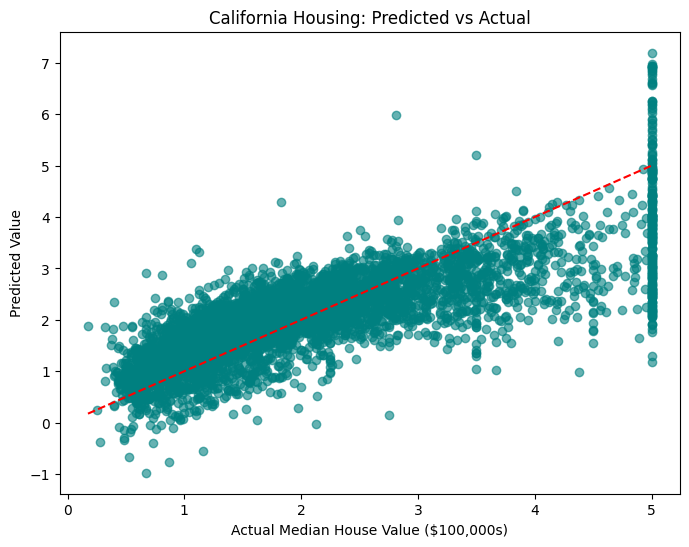

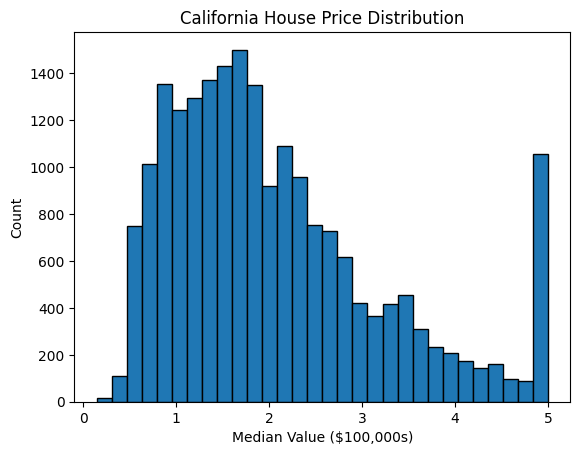

California House Price Prediction
R²: 0.6078944086580238
RMSE: 0.7185393332339495
MAE: 0.526903682258124


In [92]:
# Load and prepare data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Median house value in $100,000s

# Predicted vs Actual plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Value")
plt.title("California Housing: Predicted vs Actual")
plt.show()

# Visualize target distribution
plt.hist(y, bins=30, edgecolor='black')
plt.title('California House Price Distribution')
plt.xlabel('Median Value ($100,000s)')
plt.ylabel('Count')
plt.show()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Report performance
print("California House Price Prediction")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

### California House Price Prediction: Model Performance

- **R² Score:** 0.608  
  This means the model explains about 61% of the variance in house prices. While not perfect, it indicates a moderately strong fit given the complexity of housing markets.

- **RMSE:** 0.719  
  On average, predictions deviate from actual prices by about $71,900 (since the target is in $100,000s). This is a reasonable error margin for a simple linear model.

- **MAE:** 0.527  
  The average absolute error is around $52,700, showing that most predictions are fairly close to actual values.

### Interpretation

- The model performs well considering it's a basic linear regression without regularization or feature engineering.
- Features like `MedInc`, `AveRooms`, and `Latitude/Longitude` likely contributed most to predictive power.
- There’s still room for improvement — nonlinear models or log-transforming the target could reduce error further.

**Conclusion:**  
This was a successful example of continuous target prediction using regression. It demonstrates how socioeconomic and geographic features can be used to estimate housing prices with reasonable accuracy.